# Understanding the Gender Gap based on College Degrees 


My goal for this project is to analyse understanding the gender gap in college majors based on the job outcomes of the students who graduated from college in the USA between 2010 and 2012. The data, which is provided from American Community Survey is cleaned and released by FiveThirtyEight on their Github repo. This is my second project on the Data Science Path in dataquest.io, where I focus on data visualisation techniques.

I am going to divide the analysis in two parts:
* Visualizing Earnings Based On College Majors, where I will visualise the gender pay gap focusing on the STEM degrees and generate bar charts for a better understanding.
* Visualizing The Gender Gap In College Degrees, where I will compare all degree categories and generate line charts for better readability. 

## Visualizing Earnings Based On College Majors

We can see some of the columns in the dataset below, where the rows represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. 

- `Rank` - Rank by median earnings (the dataset is ordered by this column).
- `Major_code` - Major code.
- `Major` - Major description.
- `Major_category` - Category of major.
- `Total` - Total number of people with major.
- `Sample_size` - Sample size (unweighted) of full-time.
- `Men` - Male graduates.
- `Women` - Female graduates.
- `ShareWomen` - Women as share of total.
- `Employed` - Number employed.
- `Median` - Median salary of full-time, year-round workers.
- `Low_wage_jobs` - Number in low-wage service jobs.
- `Full_time` - Number employed 35 hours or more.
- `Part_time` - Number employed less than 35 hours.


Based on the data provided by this dataset I will try to explore some questions using different visualisation techniques, such as:
- I will use **scatter plots** to understand whether students in more popular majors make more money or not.
- Using **histograms** I will examine how many majors are predominantly male and redominantly female.
- With the help of **bar plots** I will analyse which category of majors have the most students.

### Introduction 
Firstly, I will need to import pandas and matplotlib libraries for this project and run `%matplotlib inline` in order to visualise the plots inline on my Jupyter Notebook.

In [213]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

Let's start with reading and getting familiar with the data. 

In [214]:
recent_grads = pd.read_csv("recent-grads.csv") #read data and assign the result
print(recent_grads.iloc[0]) #return the first row as table 
print(recent_grads.head()) #first 5 rows of the dataset 
print(recent_grads.tail()) #last 5 rows of the dataset 
print(recent_grads.describe()) #generate summary statistics for all of the numeric columns

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

Next, I need to drop the missing values since Matplotlib expects that columns of values we pass in have matching lengths. If any values are missing, matplotlib will throw errors.

In [215]:
raw_data_count = recent_grads.shape[0] #existing data length 
print(raw_data_count)
recent_grads = recent_grads.dropna() #dropping the missing values
clean_data_count = recent_grads.shape[0] #clean data length 
print(clean_data_count)

173
172


### Generating Histograms 
I will generate some scatters plots in order to examine the relations between some column names.
<br>
Let's start with generating a scatter plot to explore `Sample_size` and `Median` relation: 

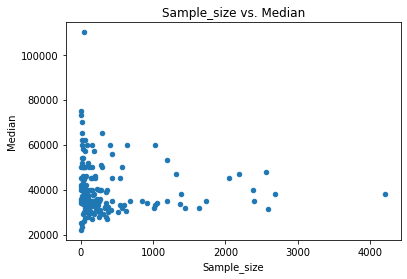

In [216]:
recent_grads.plot(x="Sample_size", y="Median", kind='scatter', title="Sample_size vs. Median")

What I understand from this scatter plot is that the popular majors tends to have an average income, while the not so popular onces might reach to incomes as high as 80000.

`Sample_size` and `Unemployment_rate` relation:


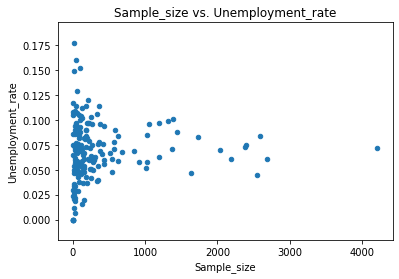

In [217]:
recent_grads.plot(x="Sample_size", y="Unemployment_rate", kind='scatter', title="Sample_size vs. Unemployment_rate")

On the other hand the relation between the popularity of the major and the unempoyement rate seems to picture a similar correlation. The most popular majors has an average unemployement rate. 

`Full_time` and `Median` relation: 

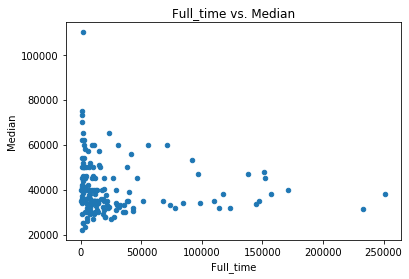

In [218]:
recent_grads.plot(x="Full_time", y="Median", kind='scatter', title="Full_time vs. Median")

`ShareWomen` and `Unemployment_rate` relation: 

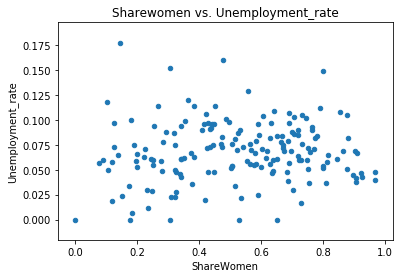

In [219]:
recent_grads.plot(x="ShareWomen", y="Unemployment_rate", kind='scatter', title="Sharewomen vs. Unemployment_rate")

From this plot, I cannot say that there is an evident correlation between the unemployement rate and womenshare. <br> Let's see if there is a difference between the men and womens incomes:

`Men` and `Median` relation: 

(-10000, 200000)

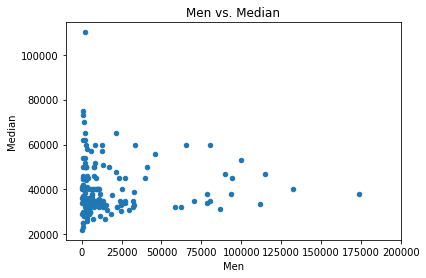

In [220]:
recent_grads.plot(x="Men", y="Median", kind='scatter', title="Men vs. Median")
plt.xlim(-10000, 200000) #setting  same limit to compare easily 

And finally generating a scatter plot to explore `Women` and `Median` relation: 

(-10000, 200000)

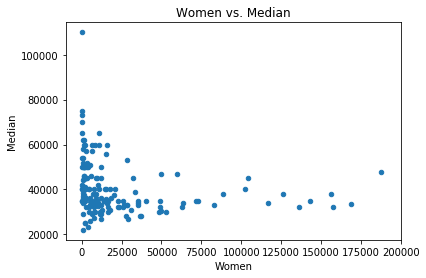

In [221]:
recent_grads.plot(x="Women", y="Median", kind='scatter', title="Women vs. Median")
plt.xlim(-10000, 200000) #setting  same limit to compare easily 

From these last two plot we can see a slight difference between women and men incomes. While many of the women in popular majors seem to earn around/below the average, men seem to have a higher income for both popular and not so popular majors. 
<br><br>
We will dive in deeply into the gender pay gap in the next section so for now let's move to generating histograms to understand better the distrubution between the genders. 

### Generating Histograms

Let's generate histograms to explore the distributions of the columns `Sample_size`, `Median`, `Employed`, `Full_time`, `ShareWomen`, `Unemployment_rate`, `Men`, `Women`:

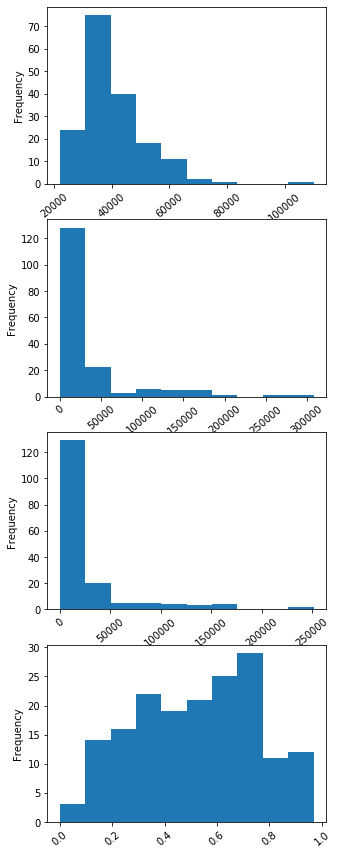

In [222]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,15))
for r in range(1,5):
    ax = fig.add_subplot(4,1,r)
    ax = recent_grads[cols[r]].plot(kind="hist", rot=40)

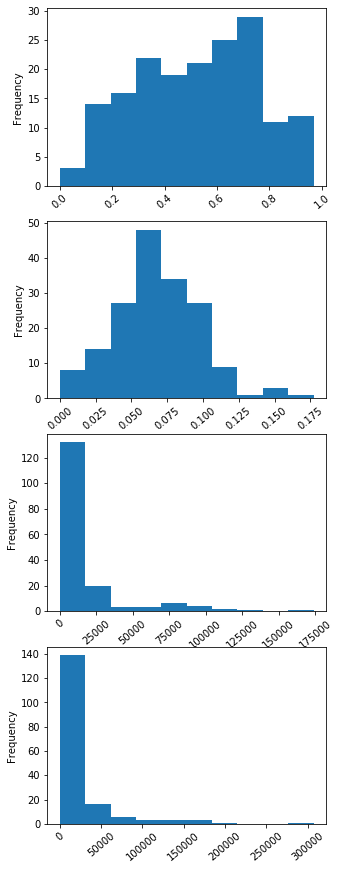

In [223]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,15))
for r in range(4,8):
    ax = fig.add_subplot(4,1,r-3)
    ax = recent_grads[cols[r]].plot(kind="hist", rot=40)

### Generating Scatter Matrix
After generating histograms and scatter plots seperately, lets move on to the scatter matrix. A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously. 
<br>
<br>
Pandas contain a scatter matrix function, since it is frequently used in data analysis exploration. First I'll import the scatter_matrix() function and then choose 2 columns names from our dataset to pass into the function. 

In [224]:
from pandas.plotting import scatter_matrix  

First I am going to analyse the relation between Sample_size and Median columns:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffcd2164b90>,
      dtype=object)

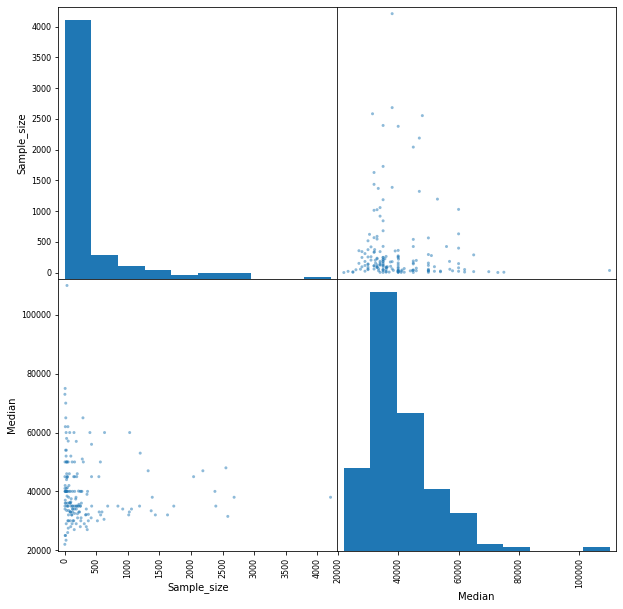

In [225]:
scatter_matrix(recent_grads[["Sample_size", "Median"]], figsize=(10,10))

Now let's add the Unemployment_rate column as well to see the correlation better.  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffcce410ad0>,
      dtype=object)

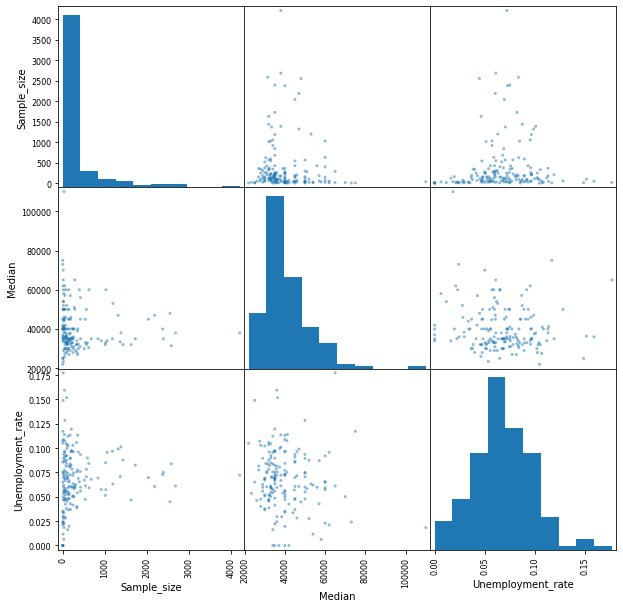

In [226]:
scatter_matrix(recent_grads[["Sample_size","Median","Unemployment_rate"]], figsize=(10,10))

### Generating Bar Plots 

I will use bar plots to compare the percentages of women from the first ten rows and last ten rows of the recent_grads dataframe to have an idea of the women share in the majors.

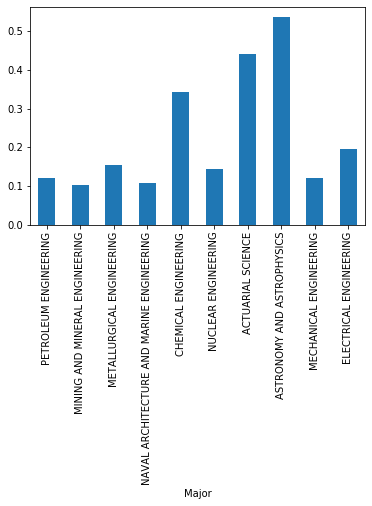

In [227]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)

As we can easily see in the first 10 most earning majors, women don't have a big share. It hardly reaches to half only for one major: Astronomy and Astrophysics. Let's see the situation in the bottom of the dataset. 

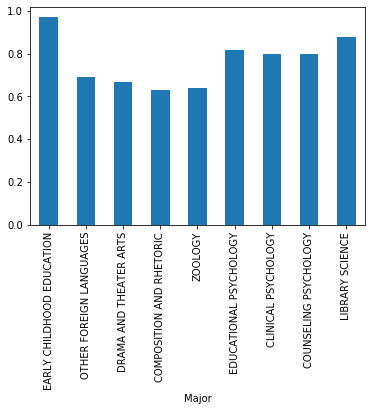

In [228]:
recent_grads[163:].plot.bar(x="Major", y='ShareWomen', legend=False)

On the contrary to the head of the dataset, women share in the bottom of the dataset is Significantly high. This show us while the well-paid jobs have majority of men, the lowest paid jobs has the majority of women share.
<br>
<br>
Let's take a look at the situation from the unempoyment point of view.

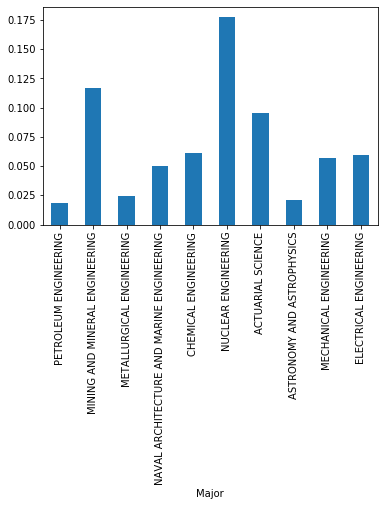

In [229]:
recent_grads[:10].plot.bar(x="Major", y='Unemployment_rate', legend=False)

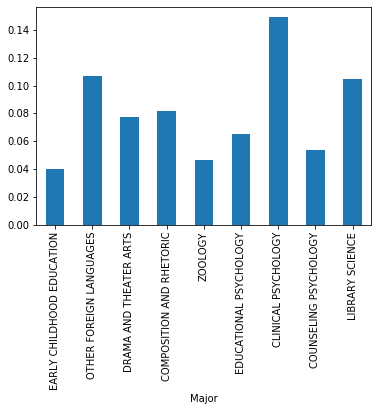

In [230]:
recent_grads[163:].plot.bar(x="Major", y='Unemployment_rate', legend=False)

From the bar plots above, we understand that the highest payed jobs has very low unemployment rates, as low as 0.02,  while the lowest paid job seem to have a higher unemployement rate, as high as 0.15. 

## Visualizing The Gender Gap In College Degrees

### Introduction

In the second part of my project, I'll extend the work I did in the first partIn the first part of the project I've  mostly focused on the STEM degrees, however now I will generate line charts to compare across all degree categories. 
<br>
<br>
Let's start with opening the dataset and getting familiar with it. 

In [231]:
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

In [232]:
print(women_degrees.head())
print(women_degrees.describe())

   Year  Agriculture  Architecture  Art and Performance    Biology   Business  \
0  1970     4.229798     11.921005                 59.7  29.088363   9.064439   
1  1971     5.452797     12.003106                 59.9  29.394403   9.503187   
2  1972     7.420710     13.214594                 60.4  29.810221  10.558962   
3  1973     9.653602     14.791613                 60.2  31.147915  12.804602   
4  1974    14.074623     17.444688                 61.9  32.996183  16.204850   

   Communications and Journalism  Computer Science  Education  Engineering  \
0                           35.3              13.6  74.535328          0.8   
1                           35.5              13.6  74.149204          1.0   
2                           36.6              14.9  73.554520          1.2   
3                           38.4              16.4  73.501814          1.6   
4                           40.5              18.9  73.336811          2.2   

     English  Foreign Languages  Health Prof

Let's see what majors we have in this dataset:

In [233]:
print(women_degrees.iloc[0]) #return the first row as table 

Year                             1970.000000
Agriculture                         4.229798
Architecture                       11.921005
Art and Performance                59.700000
Biology                            29.088363
Business                            9.064439
Communications and Journalism      35.300000
Computer Science                   13.600000
Education                          74.535328
Engineering                         0.800000
English                            65.570923
Foreign Languages                  73.800000
Health Professions                 77.100000
Math and Statistics                38.000000
Physical Sciences                  13.800000
Psychology                         44.400000
Public Administration              68.400000
Social Sciences and History        36.800000
Name: 0, dtype: float64


### Comparing all degrees 

Firstly, I am going to group the majors to be able to compare them better. The groups will be: STEM, liberal arts, and other: 

In [234]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

In order to start gradually and understand the data better, I am going to create a 1 row and 6 column subplot only for the stem degrees, let's start comparing the majors.

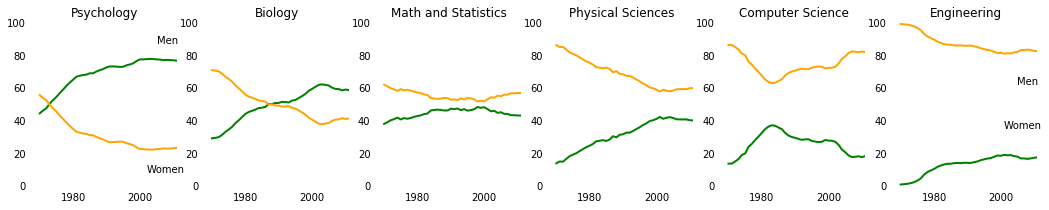

In [240]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c="green", label='Women', linewidth=2) #Generating line chart for women
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c="orange", label='Men', linewidth=2) #Generating line chart for men
    ax.spines["right"].set_visible(False) #setting the plot borders invisible
    ax.spines["left"].set_visible(False) #setting the plot borders invisible
    ax.spines["top"].set_visible(False) #setting the plot borders invisible
    ax.spines["bottom"].set_visible(False) #setting the plot borders invisible
    ax.set_xlim(1968, 2011) #setting the x limit by the given dates 
    ax.set_ylim(0,100) #setting the y limit from 0 to 100 
    ax.set_title(stem_cats[sp]) #Setting the titles of the subplots
    ax.tick_params(bottom=False, top=False, left=False, right=False) #setting the ticks invisible
    
    if sp == 0:
        ax.text(2005, 87, 'Men') #Adding text annotation for Men in the topmost plot.
        ax.text(2002, 8, 'Women') #Adding text annotation for Women in the topmost plot.
    elif sp == 5:
        ax.text(2005, 62, 'Men') #Adding text annotation for Men in the bottommost plot.
        ax.text(2001, 35, 'Women') #Adding text annotation for Women in the bottommost plot.
plt.show()

Because there are seventeen degrees that we need to generate line charts for, we'll use a subplot grid layout of 6 rows by 3 columns. 
Let's start with creating the subplot grid:

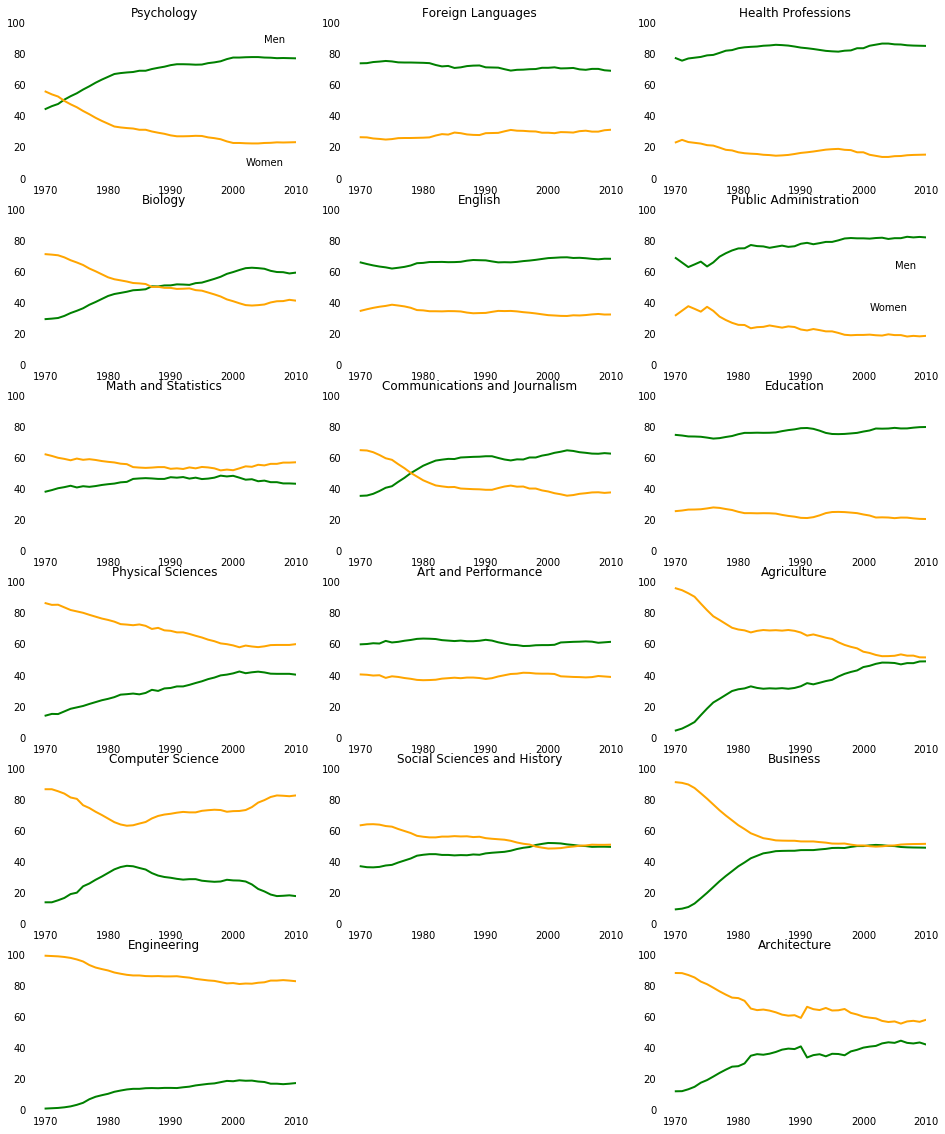

In [242]:
fig = plt.figure(figsize=(16, 20))

# generating first column of line charts; stem degrees
for sp in range(0,18,3):
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees["Year"], women_degrees[stem_cats[cat_index]], c="green", label="Women", linewidth=2) #Generating line chart for women
    ax.plot(women_degrees["Year"], 100 - women_degrees[stem_cats[cat_index]], c="orange", label="Women", linewidth=2) #Generating line chart for men
    ax.spines["right"].set_visible(False) #setting the plot borders invisible
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False) 
    ax.spines["top"].set_visible(False) 
    ax.set_xlim(1968,2010) #setting the x limit by the given dates 
    ax.set_ylim(0,100) #setting the y limit from 0 to 100 (percentage)
    ax.set_title(stem_cats[cat_index]) #setting the titles of the subplots
    ax.tick_params(bottom=False, top=False, left=False, right=False) #setting the ticks off 

    
    if sp == 0:
        ax.text(2005, 87, "Men") #Adding text annotation for Men in the topmost plot.
        ax.text(2002, 8,"Women") #Adding text annotation for Women in the topmost plot.
    elif sp == 5:
        ax.text(2005, 62, 'Men') #Adding text annotation for Men in the bottommost plot.
        ax.text(2001, 35, 'Women') #Adding text annotation for Women in the bottommost plot.

# generating second column of line charts; liberal arts degrees
for sp in range(1,16,3):
    cat_index = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees["Year"], women_degrees[lib_arts_cats[cat_index]], c="green", label="Women", linewidth=2)
    ax.plot(women_degrees["Year"], 100 - women_degrees[lib_arts_cats[cat_index]], c="orange", label="Women", linewidth=2)
    ax.spines["right"].set_visible(False) #setting the plot borders invisible
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False) 
    ax.spines["top"].set_visible(False) 
    ax.set_xlim(1968,2010)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False) #setting the ticks off 

    if sp == 0:
        ax.text(2003, 78, "Men")
        ax.text(2005, 18,"Women")

# generating third column of line charts; other category degrees       
for sp in range(2,20,3):
    cat_index = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees["Year"], women_degrees[other_cats[cat_index]], c="green", label="Women", linewidth=2)
    ax.plot(women_degrees["Year"], 100 - women_degrees[other_cats[cat_index]], c="orange", label="Women", linewidth=2)
    ax.spines["right"].set_visible(False) #setting the plot borders invisible
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False) 
    ax.spines["top"].set_visible(False) 
    ax.set_xlim(1968,2010)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False) #setting the ticks off 
    
    if sp == 0:
        ax.text(2005, 87, "Men")
        ax.text(2002, 8,"Women")
    if sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        

plt.show()

### Making the plot more readable 

#### Disabling x-axis labels 

Before analysing the data, I awill focus on making the plots more readable and easily comprehensible because with seventeen line charts in one diagram, the non-data elements quickly clutter the field of view.
<br>
<br>
First, I will start with the ticks in the bottom of each plot because they overlap with the titles. Since we need to have the plot titles to understand which plot we are looking at, it wouldn't be very wise removing the titles, instead I'll remove the date ticks. I will keep only the most bottom ticks to be able to read the data easily. 

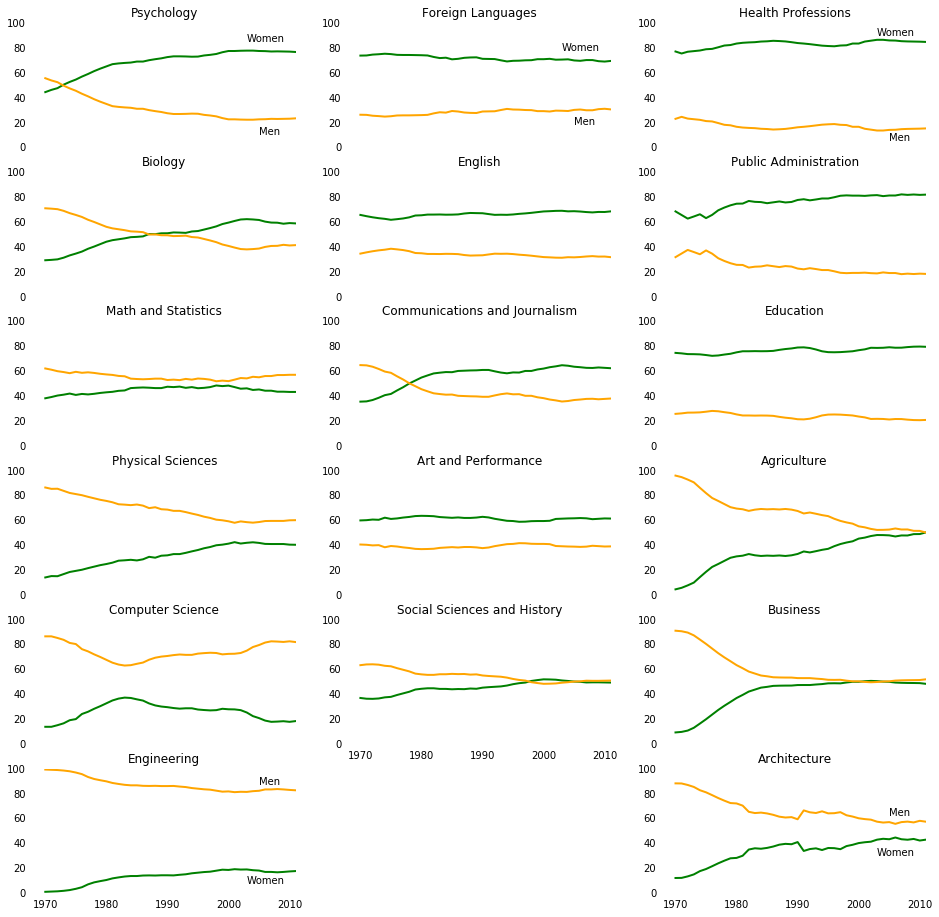

In [243]:
fig = plt.figure(figsize=(16, 16))

# generating first column of line charts; stem degrees
for sp in range(0,18,3):
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c="green", label='Women', linewidth=2)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c="orange", label='Men', linewidth=2)
    ax.spines["right"].set_visible(False) #setting the plot borders invisible
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False) 
    ax.spines["top"].set_visible(False) 
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False) # Disabling x-axis labels 
    
    if cat_index == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif cat_index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
        ax.tick_params(labelbottom='on')

# generating second column of line charts; liberal arts degrees
for sp in range(1,16,3):
    cat_index = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c="green", label='Women', linewidth=2)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c="orange", label='Men', linewidth=2)
    ax.spines["right"].set_visible(False) #setting the plot borders invisible
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False) 
    ax.spines["top"].set_visible(False) 
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False) # Disabling x-axis labels 
    
    if cat_index == 0:
        ax.text(2003, 78, 'Women')
        ax.text(2005, 18, 'Men')
    elif cat_index == 4:
        ax.tick_params(labelbottom='on')

# generating third column of line charts; other category degrees       
for sp in range(2,20,3):
    cat_index = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c="green", label='Women', linewidth=2)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c="orange", label='Men', linewidth=2)
    ax.spines["right"].set_visible(False) #setting the plot borders invisible
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False) 
    ax.spines["top"].set_visible(False) 
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False) # Disabling x-axis labels 
    
    if cat_index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
        ax.tick_params(labelbottom='on')
        
plt.show()

#### Simplifing y-axis labels 

Currently, all seventeen plots have six y-axis labels and even though they are consistent across the plots, they still add to the visual clutter. By keeping just the starting and ending labels (0 and 100), we can keep some of the benefits of having the y-axis labels to begin with.

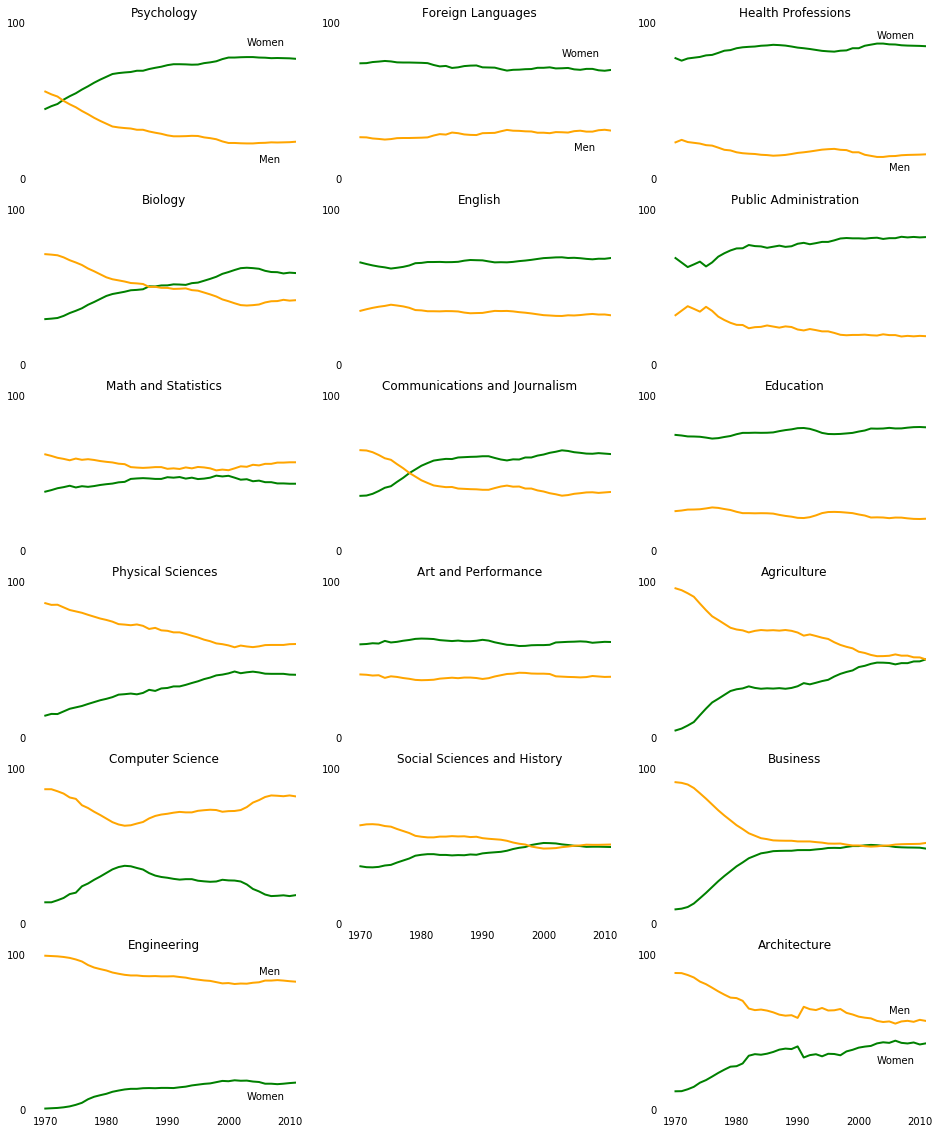

In [244]:
fig = plt.figure(figsize=(16, 20))

# generating first column of line charts; stem degrees
for sp in range(0,18,3):
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c="green", label='Women', linewidth=2)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c="orange", label='Men', linewidth=2)
    ax.spines["right"].set_visible(False) #setting the plot borders invisible
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False) 
    ax.spines["top"].set_visible(False) 
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False) # Disabling x-axis labels 
    ax.set_yticks([0,100]) # Simplifing y-axis labels 
    
    if cat_index == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif cat_index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
        ax.tick_params(labelbottom='on')

# generating second column of line charts; liberal arts degrees
for sp in range(1,16,3):
    cat_index = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c="green", label='Women', linewidth=2)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c="orange", label='Men', linewidth=2)
    ax.spines["right"].set_visible(False) #setting the plot borders invisible
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False) 
    ax.spines["top"].set_visible(False) 
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False) # Disabling x-axis labels 
    ax.set_yticks([0,100]) # Simplifing y-axis labels 
    
    if cat_index == 0:
        ax.text(2003, 78, 'Women')
        ax.text(2005, 18, 'Men')
    elif cat_index == 4:
        ax.tick_params(labelbottom='on')

# generating third column of line charts; other category degrees       
for sp in range(2,20,3):
    cat_index = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c="green", label='Women', linewidth=2)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c="orange", label='Men', linewidth=2)
    ax.spines["right"].set_visible(False) #setting the plot borders invisible
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False) 
    ax.spines["top"].set_visible(False) 
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False) # Disabling x-axis labels 
    ax.set_yticks([0,100]) # Simplifing y-axis labels 
    
    if cat_index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
        ax.tick_params(labelbottom='on')
        
plt.show()

#### Adding a horizontal line 

While removing most of the y-axis labels definitely reduced clutter, it also made it hard to understand which degrees have close to 50-50 gender breakdown. While keeping all of the y-axis labels would have made it easier, we can actually do one better and use a horizontal line across all of the line charts where the y-axis label 50 would have been.

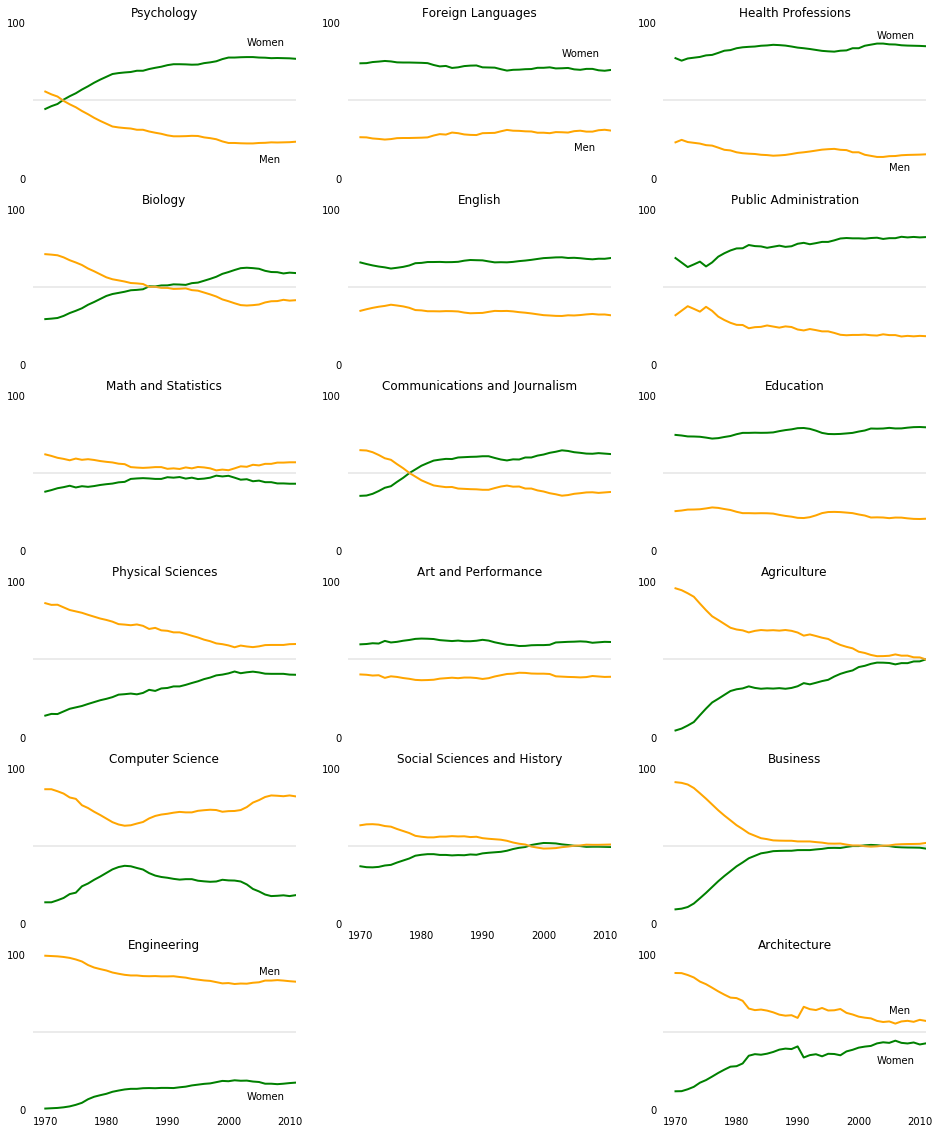

In [247]:
fig = plt.figure(figsize=(16, 20))

# generating first column of line charts; stem degrees
for sp in range(0,18,3):
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c="green", label='Women', linewidth=2)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c="orange", label='Men', linewidth=2)
    ax.spines["right"].set_visible(False) #setting the plot borders invisible
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False) 
    ax.spines["top"].set_visible(False) 
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False) # Disabling x-axis labels 
    ax.set_yticks([0,100]) # Simplifing y-axis labels 
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3) # Adding a horizontal line 
    
    if cat_index == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif cat_index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
        ax.tick_params(labelbottom='on')

# generating second column of line charts; liberal arts degrees
for sp in range(1,16,3):
    cat_index = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c="green", label='Women', linewidth=2)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c="orange", label='Men', linewidth=2)
    ax.spines["right"].set_visible(False) #setting the plot borders invisible
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False) 
    ax.spines["top"].set_visible(False) 
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False) # Disabling x-axis labels 
    ax.set_yticks([0,100]) # Simplifing y-axis labels 
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3) # Adding a horizontal line 
    
    if cat_index == 0:
        ax.text(2003, 78, 'Women')
        ax.text(2005, 18, 'Men')
    elif cat_index == 4:
        ax.tick_params(labelbottom='on')

# generating third column of line charts; other category degrees       
for sp in range(2,20,3):
    cat_index = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c="green", label='Women', linewidth=2)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c="orange", label='Men', linewidth=2)
    ax.spines["right"].set_visible(False) #setting the plot borders invisible
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False) 
    ax.spines["top"].set_visible(False) 
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False) # Disabling x-axis labels 
    ax.set_yticks([0,100]) # Simplifing y-axis labels 
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3) # Adding a horizontal line 
    
    if cat_index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
        ax.tick_params(labelbottom='on')
               
plt.show()